In [1]:
import numpy as np
import cv2
from os import listdir
from os.path import isfile, join
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input, decode_predictions
from tensorflow.keras.preprocessing import image
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten

In [2]:
res_net = ResNet50(weights="imagenet")

In [3]:
#resnet.summary()

In [4]:
total_layers = res_net.layers
print(f'Total Layers: {len(total_layers)} ')

Total Layers: 177 


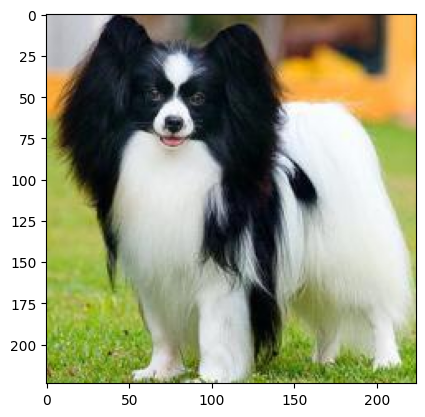

In [5]:
img = "./Dog_Dataset/n02086910_334.jpg"
photo = plt.imread(img)
plt.imshow(photo)
plt.show()

**vgg16.preprocess_input** will convert the input images from RGB to BGR, then will zero-center each color channel with respect to the ImageNet dataset, without scaling.

In [6]:
img_load_size = image.load_img(img, target_size=(224,224))
x = image.img_to_array(img_load_size)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x) 
#x

In [7]:
modelPredictions = res_net.predict(x)
#modelPredictions

1/1 [==============================] - 2s 2s/step


In [8]:
decode_predictions(modelPredictions, top=3)

[[('n02086910', 'papillon', 0.8612672),
  ('n02085782', 'Japanese_spaniel', 0.12663653),
  ('n02102480', 'Sussex_spaniel', 0.0025979916)]]

In [9]:
_, classname, accuracy = decode_predictions(modelPredictions, top=3)[0][0]
print("Predicted Class: {}\nAccuracy: {:.2f}%".format(classname.replace("_",' '), accuracy*100))

Predicted Class: papillon
Accuracy: 86.13%


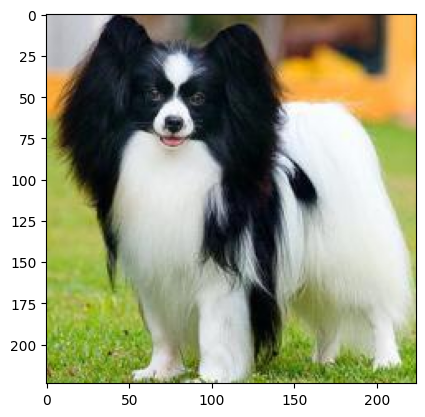

Predicted Class: papillon
Accuracy: 86.13%


In [10]:
plt.imshow(photo)
plt.show()
print("Predicted Class: {}\nAccuracy: {:.2f}%".format(classname.replace("_",' '), accuracy*100))

In [11]:
def textOnImage(name, predictions, input_image):
    backgroundColor = [0, 0, 0]
    expandImage = cv2.copyMakeBorder(input_image, 0, 0, 0, input_image.shape[1]+300, cv2.BORDER_CONSTANT, value=backgroundColor)
    image_width = input_image.shape[1]
    for (i, prediction) in enumerate(predictions):
        imageStrings = str(prediction[1]).replace("_",' ') + " " + str(prediction[2])
        cv2.putText(expandImage, str(name), (image_width+50, 50), cv2.FONT_HERSHEY_COMPLEX_SMALL, 1, (255,255,255), 1)
        cv2.putText(expandImage, imageStrings, (image_width+50, 50 + ((i + 1) * 50)), cv2.FONT_HERSHEY_COMPLEX_SMALL, 1, (255,255,255), 1)     
        plt.imshow(expandImage)
    plt.show()

In [12]:
path = "./Dog_Dataset/"
fileName = [f for f in listdir(path) if isfile(join(path, f))]
fileName

['n02085620_4919.jpg',
 'n02085782_267.jpg',
 'n02085936_426.jpg',
 'n02086079_884.jpg',
 'n02086240_306.jpg',
 'n02086646_117.jpg',
 'n02086910_334.jpg',
 'n02087046_2058.jpg',
 'n02087394_381.jpg',
 'n02088364_852.jpg',
 'n02088466_9697.jpg']

1/1 [==============================] - 0s 272ms/step


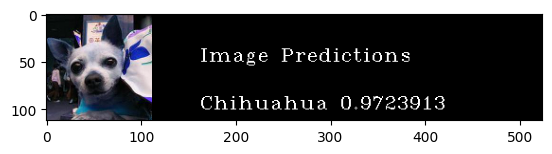

1/1 [==============================] - 0s 284ms/step


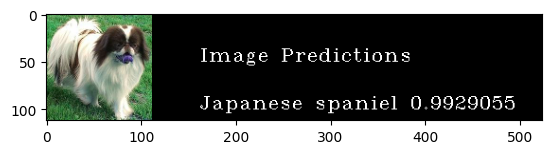

1/1 [==============================] - 0s 270ms/step


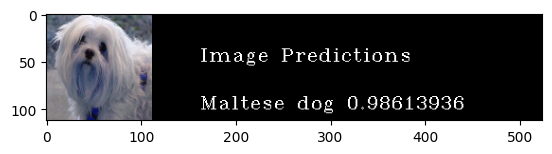

1/1 [==============================] - 0s 272ms/step


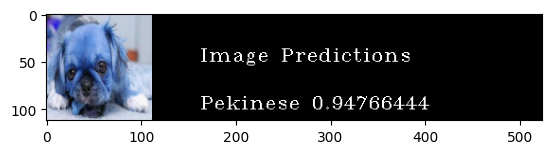

1/1 [==============================] - 0s 303ms/step


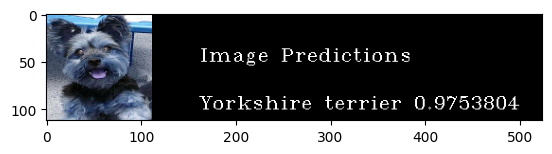

1/1 [==============================] - 0s 304ms/step


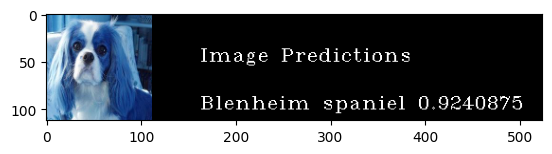

1/1 [==============================] - 0s 363ms/step


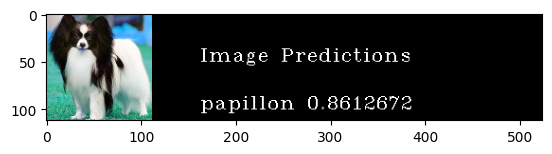

1/1 [==============================] - 0s 292ms/step


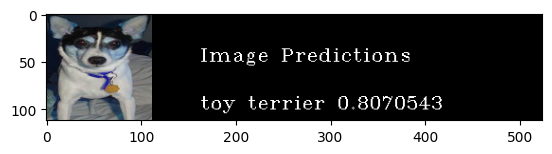

1/1 [==============================] - 0s 248ms/step


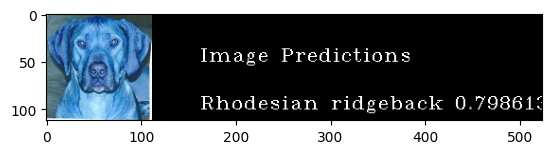

1/1 [==============================] - 0s 257ms/step


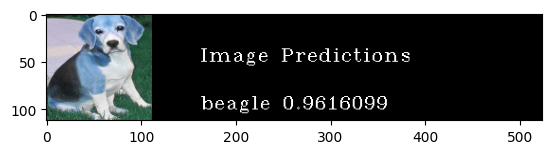

1/1 [==============================] - 0s 245ms/step


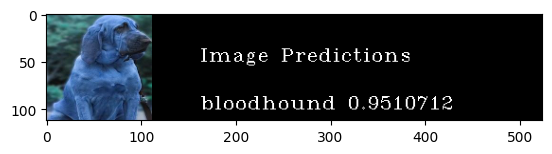

In [13]:
for i in fileName:
    img_load_size = image.load_img(path+i, target_size=(224,224))
    x = image.img_to_array(img_load_size)
    x = np.expand_dims(x, axis = 0)
    x = preprocess_input(x)  
    update = cv2.imread(path+i)
    resize = cv2.resize(update, None, fx = 0.5, fy = 0.5, interpolation = cv2.INTER_CUBIC)   
    predict = res_net.predict(x)
    predict = decode_predictions(predict, top = 3)[0]
    textOnImage("Image Predictions ", predict, resize)